In [ ]:
#импортирую библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
# создаю датафрейм, считывая файл с историческими данными
df = pd.read_csv("/content/sample_data/canada_per_capita_income.csv")
#переименовал колонку в одно слово
df.rename(columns={'per capita income (US$)': 'income'}, inplace=True)

In [ ]:
df.tail()

,year,income
42,2012,42665.25597
43,2013,42676.46837
44,2014,41039.89360
45,2015,35175.18898
46,2016,34229.19363


In [ ]:
print(df.columns)

Index(['year', 'income'], dtype='object')


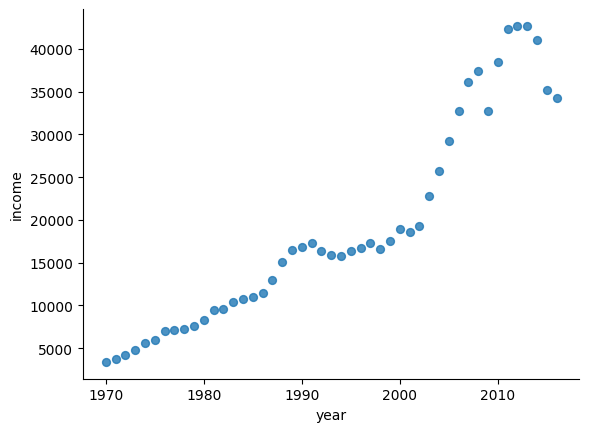

In [ ]:
# создал картинку исторических данных, the plot using the colab notebook recommended code
df.plot(kind='scatter', x='year', y='income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Создал объект с моделью линейной регрессии и подогнал модель под данные
# вычислил уравнение прямой линии
reg = linear_model.LinearRegression()
reg.fit(df[['year']], df.income)

LinearRegression()

In [ ]:
reg.coef_, reg.intercept_

(array([828.46507522]), -1632210.7578554575)

In [ ]:
# спрогнозировал величину дохода в 2020 году, используя модель
reg.predict([[2020]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [ ]:
#создал датафрейм с будущими периодами, чтобы предсказать для них величины дохода
df1 = pd.DataFrame({'year':[2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]})

In [ ]:
df1


,year
0,2017
1,2018
2,2019
3,2020
4,2021
5,2022
6,2023
7,2024
8,2025
9,2026


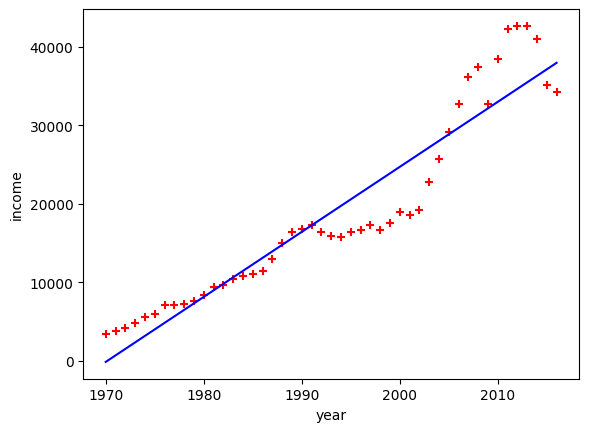

In [ ]:
# Проиллюстрировал исторические данные (красные крестики) с наложенной
# на них прямой предсказательной модели (голубая линия)
#the plot using code from the tutorial with a modelled straight line
%matplotlib inline
plt.xlabel('year')
plt.ylabel('income')
plt.scatter(df.year, df.income, color='red', marker='+')
plt.plot(df.year, reg.predict(df[['year']]), color='blue')

In [ ]:
# прогнозирую ежегодные величины дохода на будущий период (2017 - 2030),
# используя созданную модель на файле с будущими периодами
# передаю прогнозные данные в переменную income
income = reg.predict(df1)


In [ ]:
# передаю прогнозные значения из переменной income в датафрейм с будущими периодами
df1['income']=income
df1

,year,income
0,2017,38803.298869
1,2018,39631.763944
2,2019,40460.229019
3,2020,41288.694094
4,2021,42117.159170
5,2022,42945.624245
6,2023,43774.089320
7,2024,44602.554395
8,2025,45431.019471
9,2026,46259.484546


In [ ]:
# Объединяю датафрейм с историческими данными (train data) с датафреймом с прогнозными данными
# для создания общего файла
df2 = pd.concat([df, pd.DataFrame.from_records(df1)])
df2

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
...,...,...
9,2026,46259.484546
10,2027,47087.949621
11,2028,47916.414696
12,2029,48744.879771


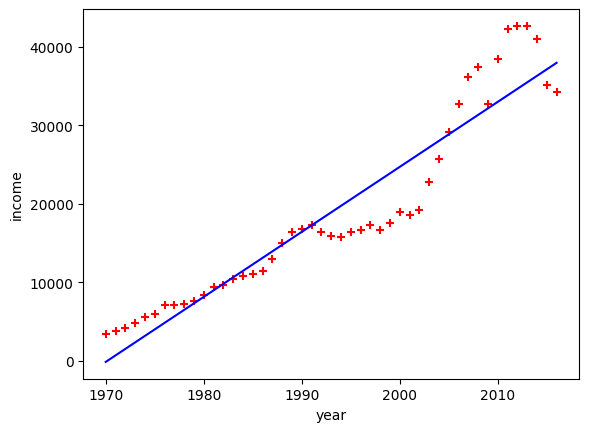

In [ ]:
#Создаю иллюстрацию к историческим (красные крестики) и прогнозным (синяя линия) данным
%matplotlib inline
plt.xlabel('year')
plt.ylabel('income')
plt.scatter(df.year, df.income, color='red', marker='+')
plt.plot(df.year, reg.predict(df[['year']]), color='blue')

Надо сохранить модель в файл, посмотреть видео.